# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_nonorm.csv"
paths.gen_1_path <- "../data/results/gen_prof_147000.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,P1.3.A3,P1.3.B10,P1.3.B12,P1.3.B2,P1.3.B8,P1.3.D1,P1.3.D12,P1.3.D9,P1.3.E1,P1.3.E4,⋯,GHA501A41,GHA501A47,GHA501A48,GHA501A54,GHA501A69,GHA501A70,GHA501A72,GHA501A74,GHA501A83,GHA501A93
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.703765,0.000000,0.000000,5.227279,4.800641,0.0000000,0.0000000,0.000000,⋯,0.5448804,0.7823517,0.6369969,2.175254,0.000000,1.7801001,3.801378,0.7655439,0.000000,3.4088070
Cd47,0.000000,3.196922,5.099716,2.918386,5.226123,0.000000,3.658783,3.0373822,0.0000000,7.142720,⋯,2.7807633,8.4777158,9.2550843,8.408633,6.871060,9.2950091,4.947373,8.5891534,9.918273,9.7571295
Elmo2,8.091382,5.988912,6.964745,4.581351,6.436295,4.409391,4.185867,4.3490821,0.3561438,7.410918,⋯,5.6864396,0.7812074,0.0000000,2.647312,0.000000,0.5416181,0.000000,3.9701527,2.691955,1.6911530
Crip2,7.533408,0.000000,3.824768,0.000000,0.000000,0.000000,0.000000,5.8872816,3.7516779,0.000000,⋯,8.1795533,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.9078236,0.000000,0.0000000
Pprc1,0.000000,2.914565,4.851999,5.107269,3.198494,4.257765,5.157044,0.0000000,0.4114262,3.766595,⋯,0.3990446,2.5846768,0.0000000,3.723433,4.377274,0.2765536,3.884531,0.3138547,0.000000,0.5628152
Ccdc174,0.000000,2.704872,2.817623,3.266037,4.399855,4.531693,3.204767,0.6322682,1.7355222,0.000000,⋯,1.4413852,1.7464567,1.0269647,4.373164,4.417183,5.3613503,0.000000,0.0000000,5.389610,1.6996514


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep147000_0,gencell_ep147000_1,gencell_ep147000_2,gencell_ep147000_3,gencell_ep147000_4,gencell_ep147000_5,gencell_ep147000_6,gencell_ep147000_7,gencell_ep147000_8,gencell_ep147000_9,⋯,gencell_ep147000_490,gencell_ep147000_491,gencell_ep147000_492,gencell_ep147000_493,gencell_ep147000_494,gencell_ep147000_495,gencell_ep147000_496,gencell_ep147000_497,gencell_ep147000_498,gencell_ep147000_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,2.861188,2.839078,2.859323,2.920361,2.873228,2.878287,2.893539,2.870242,2.885004,2.851626,⋯,2.889724,2.882781,2.869893,2.848837,2.902301,2.862686,2.858484,2.887915,2.876516,2.892381
Cd47,1.576340,1.589559,1.588846,1.585362,1.591647,1.588880,1.588431,1.585582,1.591913,1.575439,⋯,1.580028,1.600278,1.578386,1.591455,1.584757,1.587464,1.587965,1.586074,1.592376,1.572660
Elmo2,3.137257,3.156914,3.150550,3.141742,3.150315,3.135519,3.121100,3.144125,3.157842,3.116159,⋯,3.138651,3.143654,3.130102,3.155364,3.156123,3.141534,3.119000,3.155152,3.145095,3.146730
Crip2,15.316317,15.337113,15.334663,15.383214,15.396318,15.357066,15.365107,15.343505,15.319284,15.346237,⋯,15.344037,15.369257,15.361692,15.336360,15.390434,15.370938,15.352384,15.359342,15.362027,15.366092
Pprc1,3.453713,3.455494,3.464180,3.458264,3.446968,3.457896,3.433572,3.443153,3.469003,3.436944,⋯,3.445414,3.449229,3.446412,3.457048,3.462541,3.459309,3.427797,3.461768,3.453242,3.439422
Ccdc174,3.100007,3.126828,3.119763,3.091086,3.162053,3.105075,3.148826,3.141610,3.087995,3.174272,⋯,3.123032,3.159754,3.177899,3.143400,3.111896,3.138925,3.143136,3.112499,3.137314,3.092452


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

PC_ 1 
Positive:  Tex9, Fads1, Pdlim7, Ruvbl2, Fn1, Cog5, Dcdc2c, Tonsl, Spats2, Eno1 
	   Lamb1, Smco1, Spc24, Basp1, Prim2, Asl, Cenpf, Zfp825, Krit1, Zfp799 
	   Acp6, Uhrf1bp1l, Aebp1, Mad2l1, Glipr1, Tbc1d20, Nme7, Rab7, 4930579G24Rik, Sdccag8 
Negative:  Rps29, Rps3a1, Actb, Rps16, B2m, Actg1, Perp, Hspb1, Hsp90ab1, Rpl23 
	   Rpl32, Rpl19, Dmkn, Sbsn, S100a11, Anxa2, Dapl1, Rps12, Anxa8, Krt10 
	   Fam25c, Apoe, Ly6d, Sfn, Krtdap, Klf4, Cst6, Capns2, Fos, Krt15 
PC_ 2 
Positive:  Sod1, Cand2, Fth1, Tubb5, Uqcrc1, Gja1, Eno1, Fkbp3, Gatad1, Cct2 
	   Galk1, Ifitm2, Gstp1, Rps7, Tspan3, Fstl1, Pin1, Cbr2, Cd81, Cox5b 
	   Mrpl42, Prelid1, Rpl34, Atad2, Arhgdia, Cfl1, Gpn1, Scd2, Actb, Sparc 
Negative:  Dsg1a, Fosb, Tmem45a, Skint3, Ly6g6c, Lgals7, Lipm, Spink5, Ankrd35, Sbsn 
	   Mon1b, Crip2, Dmkn, Rps6ka6, L1cam, Grhl3, Sdr16c5, Calm4, Sorbs1, Cebpa 
	   Ano9, Psapl1, Nfe2l1, Klk7, Sptlc3, Krtdap, Cds1, Ly6g6e, Pof1b, Dgat2 
PC_ 3 
Positive:  Nupr1, Acer1, Ptgs1, Ly6a, Dhrs7, Kl

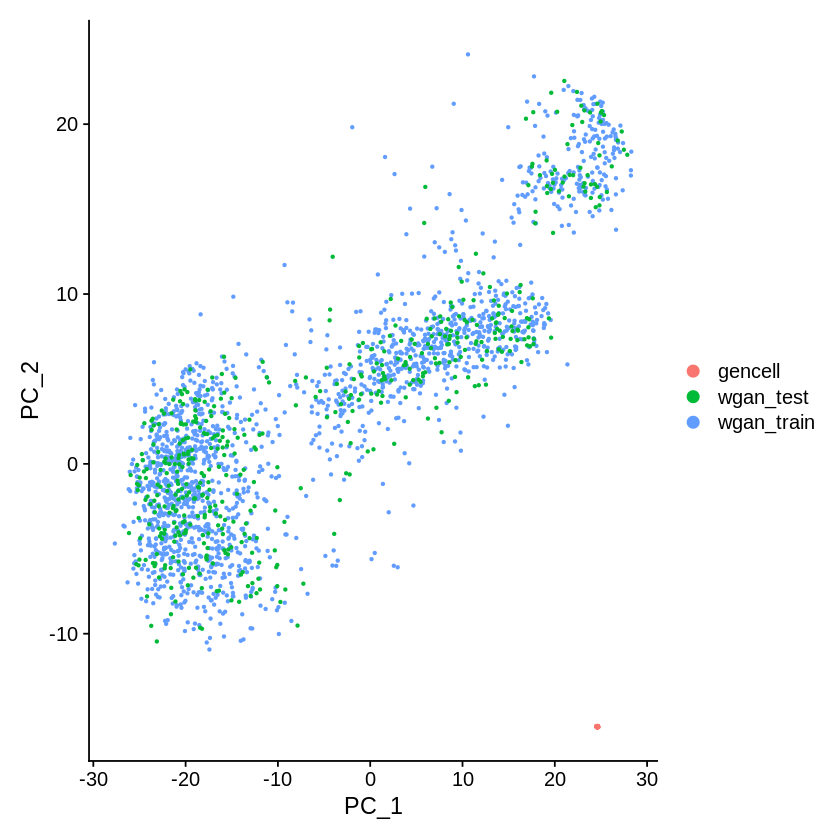

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

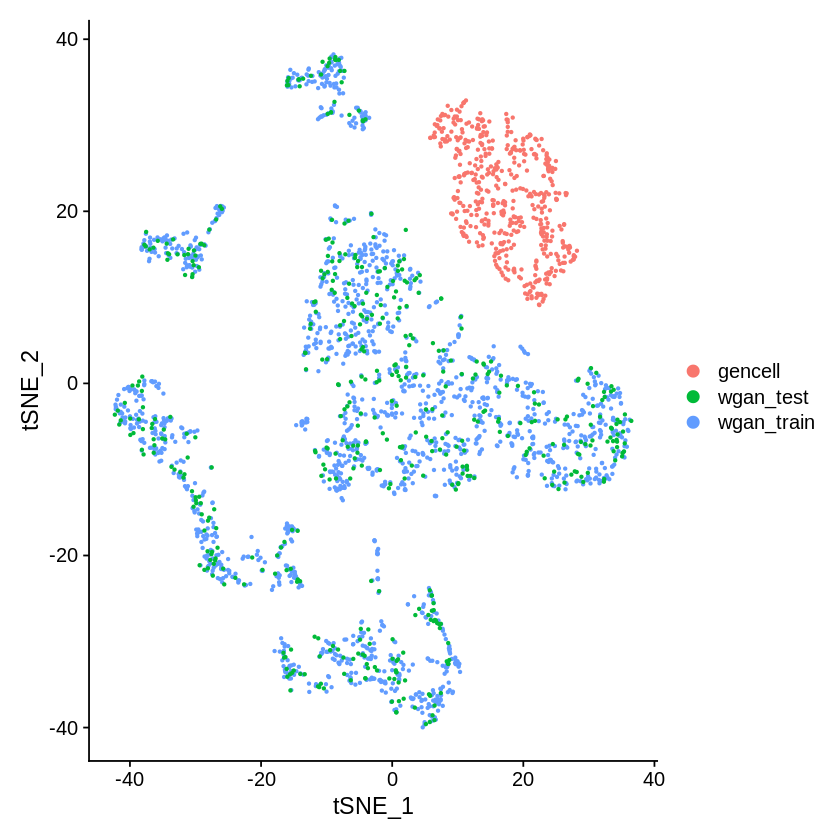

In [19]:
DimPlot(data_combined, reduction = "tsne")